In [4]:
import cv2
from mtcnn import MTCNN
import psycopg2
import matplotlib.pyplot as plt
from facenet_pytorch import InceptionResnetV1
from pymilvus import Milvus, DataType, Collection, connections
import numpy as np
import torch
import math
from PIL import Image
import insightface
from insightface.app.common import Face
from insightface.model_zoo import model_zoo
# Load the image

rec_model_path = 'C:/Users/User4/PycharmProjects/eTanuReincarnationAPI/metadata/insightface/models/w600k_mbf.onnx'
rec_model = model_zoo.get_model(rec_model_path)
rec_model.prepare(ctx_id=0)

# Initialize the MTCNN detector
detector = MTCNN(steps_threshold=[0.7, 0.8, 0.9], min_face_size=40)
#resnet = InceptionResnetV1(pretrained='vggface2').eval()

# Initialize ArcFace model
milvus = Milvus(host='localhost', port='19530')
connections.connect(
  host='localhost', 
  port='19530'
)

conn = psycopg2.connect(
    host='localhost',
    database='eTanu',
    user='postgres',
    password='postgres'
)

cursor = conn.cursor()

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}


[WARNING] PyMilvus: 


In [27]:
def search_faces_in_milvus(embedding, collection_name):
    collection = Collection("face_embeddings")
    collection.load()
    # Search for the closest embeddings in the Milvus collection
    search_params = {"metric_type": "L2", "params": {"nprobe": 32}}

    results = collection.search(
        anns_field="face_vector", 
        data=[embedding],
        limit=10,
        param=search_params
    )
    # Retrieve vector IDs of the closest embeddings
    vector_ids = [result.id for result in results[0]]
    distances = [result.distance for result in results[0]]

    return vector_ids, distances

In [28]:
def fetch_data_from_postgres(vector_ids, probabilities):
    # Fetch data from PostgreSQL for each vector ID and print along with distances
    for vector_id, prob in zip(vector_ids, probabilities):
        cursor.execute("SELECT surname, firstname FROM metadata_metadata WHERE vector_id = %s", (vector_id,))
        data = cursor.fetchone()
        print("vector_id:", vector_id)
        print("probability:", prob)
        print("data:", data)
        print()

In [7]:
def convert_image_to_embeddingv2(img, face):
    # Detect faces in the image
    rec_model.get(img, face)
    embeddings = face.normed_embedding
    return embeddings.squeeze().tolist()

In [25]:
imagePath = 'C:/Users/User4/PycharmProjects/eTanuReincarnationAPI/metadata/data/bugs/1000.jpg'
img = cv2.imread(imagePath)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

1/1 [==============================] - 0s 27ms/step


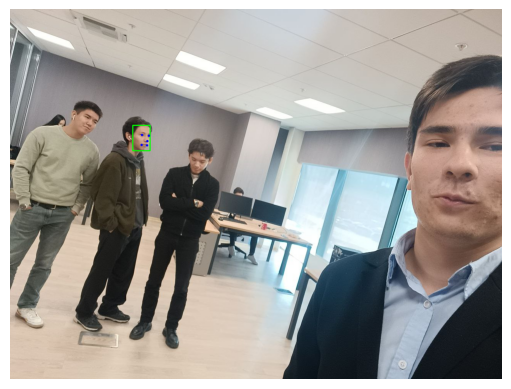

vector_id: d6a2793f-ce71-4689-a705-92b6a22071fa
probability: 0.883090615272522
data: ('ҚУАНЫШБЕКОВ', 'МАДИЯР')

vector_id: 3b707bf7-09c4-4d04-8e25-2cc7fa02af4e
probability: 1.2528800964355469
data: ('АМАНГЕЛДІ', 'ХАСЕН')

vector_id: b70150cc-b572-4747-9ce0-df9a92f34db6
probability: 1.2579896450042725
data: ('ХАНСЕЙІТ', 'ШЕРХАН')

vector_id: a77ad4a6-c30f-421e-a8a5-bd269ecacf5b
probability: 1.280029058456421
data: ('НУРЛАНОВ', 'РАХАТ')

vector_id: 0c7f51bb-c3a8-4470-847c-bc26c3048afd
probability: 1.2903591394424438
data: ('САКТАРБЕКОВ', 'АЛИХАН')

vector_id: 5b06bd9c-d22d-460f-bed2-11282e29dff1
probability: 1.3026704788208008
data: ('КАНАТ', 'АЙДАХАР')

vector_id: 67bbdf7c-4f88-45ff-be97-eb3fec4592fc
probability: 1.3059396743774414
data: ('БЕКЕТАЕВ', 'МИРАС')

vector_id: f00b17c0-ccc2-47f3-9a74-9eede5e7eebb
probability: 1.3238483667373657
data: ('ЖАҚСЫЛЫҚ', 'РАЙЫМБЕК')

vector_id: d6501949-80c5-4bfd-bb11-9c3390a448db
probability: 1.3253031969070435
data: ('СЕРИКОВ', 'БЕКЗАТ')

vector_id

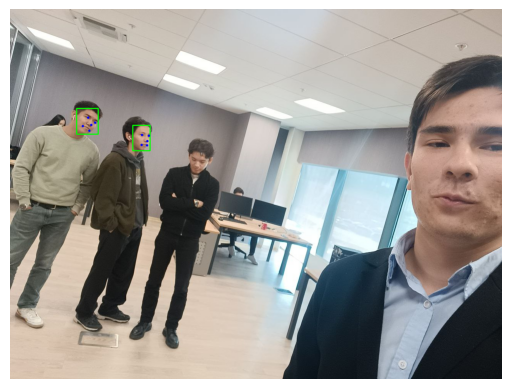

vector_id: 850c8bc2-b9ea-4a56-ad1b-b628ee5a4847
probability: 1.0765669345855713
data: ('БЕГЕНОВ', 'ДАМИР')

vector_id: 1d06e4ea-9c77-4c26-99da-74bd836d46e6
probability: 1.2074005603790283
data: ('ДУЙСЕНОВ', 'АЛДИЯР')

vector_id: 55188a3f-4026-42dc-8529-6903d09a621f
probability: 1.212884545326233
data: ('ИСКАЛИЕВ', 'ТАГИР')

vector_id: 4400a577-7a9e-4a7b-924e-fc0f42678747
probability: 1.2246582508087158
data: ('КЕНЕСХАНОВ', 'АЛИБЕК')

vector_id: 1e17227e-1513-462e-908d-1227cd75beef
probability: 1.313133716583252
data: ('МҰҚАШ', 'ИЛЬЯС')

vector_id: 14e4fabd-4dd5-4a50-8923-96b2168e4409
probability: 1.3444510698318481
data: ('ОТАРБАЕВ', 'ДУМАН')

vector_id: 469d41d1-7904-4d9e-b391-9638266261bc
probability: 1.3551393747329712
data: ('ЗАРСАЕВ', 'ЕВГЕНИЙ')

vector_id: 2ee83ed9-1190-4e07-a018-efea049234a7
probability: 1.3656822443008423
data: ('ЕРГЕШОВ', 'АЗАМАТ')

vector_id: ddab7eca-2340-4285-b69f-61246b33ce82
probability: 1.3670902252197266
data: ('БАЙТУКЕНОВ', 'БАУЫРЖАН')

vector_id: c7fa

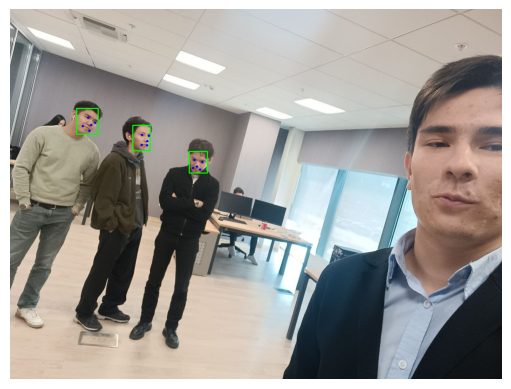

vector_id: 90c6a279-4727-4a75-ba13-37a22f34c26f
probability: 1.0721747875213623
data: ('ЕСЕНҰЛЫ', 'ТЕМІРЛАН')

vector_id: 8eaddea0-83b8-44fe-bfc4-de153d707ba4
probability: 1.3173015117645264
data: ('ШАИМОВ', 'ДИАС')

vector_id: 64b86abd-3f07-49b0-9c49-97f78ecb88f9
probability: 1.3542890548706055
data: ('СЕРІКБАЙ', 'НҰР-МҰХАММЕД')

vector_id: b367229d-b88a-437a-b686-d4a186a6a5ac
probability: 1.3598573207855225
data: ('БАҚЫТҰЛЫ', 'АҚЖОЛ')

vector_id: a0e46669-52c6-4910-9fe6-3b3436492439
probability: 1.3783410787582397
data: ('НУРЛЫБЕКОВ', 'АСЛАН')

vector_id: 5e0225d9-a38f-4c22-b1de-a61d8cc82656
probability: 1.4096230268478394
data: ('ЖАКЕЕВ', 'СҰЛТАНБЕК')

vector_id: d5db99b3-abe2-401f-ad47-023713071c80
probability: 1.4114036560058594
data: ('КОСАНОВ', 'ДИНМУХАМЕД')

vector_id: cdb57596-b390-4d33-9257-2b988fd70d8c
probability: 1.4125590324401855
data: ('БЕКЕТОВ', 'МАҒЖАН')

vector_id: 35afa519-27f6-481c-b365-72a505773039
probability: 1.4315272569656372
data: ('АБДУГАЛИ', 'РАХЫМЖАН')

ve

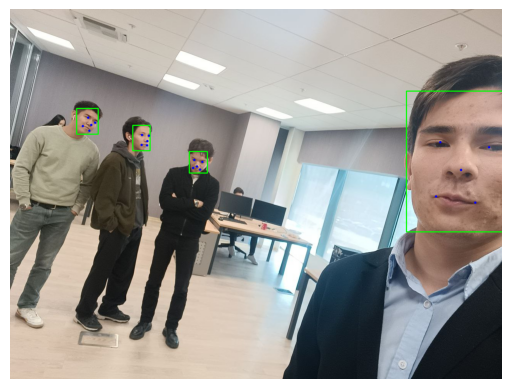

vector_id: fce8f40c-985e-4456-98f4-1e76a1e79091
probability: 0.9614208936691284
data: ('ЖАНГАЛИЕВ', 'ЖАХАНГЕР')

vector_id: cb4b40fb-b3d2-4bf6-9aa1-5b2195f0edd1
probability: 1.3851807117462158
data: ('УТЕПБЕРГЕНОВ', 'ЕЛНАР')

vector_id: d1c2dce7-685f-4990-bdf1-2ea745516f5a
probability: 1.4196231365203857
data: ('КАДРЕШЕВ', 'ТУРЕМУРАТ')

vector_id: ee4b822c-2608-49aa-a3b4-c1cf3425e389
probability: 1.4569647312164307
data: ('ТОКЕНОВ', 'ОЛЖАС')

vector_id: 55f20596-c211-4f4f-baf3-be8a4c31d672
probability: 1.4649057388305664
data: ('ҚАБКЕН', 'ҚАЙЫРКЕЛДІ')

vector_id: baa10c6a-9306-44c2-afb8-b21076e5f5c1
probability: 1.47233247756958
data: ('ЛУКАШУК', 'АЛЕКСАНДР')

vector_id: 719f7c90-8aa9-4a69-a3f0-99908691b57d
probability: 1.4772368669509888
data: ('САТЫБАЛДЫ', 'НҰРЫМ')

vector_id: a29491f7-b22d-4c62-84d1-759ce2ca6f63
probability: 1.4837640523910522
data: ('АРЫЗБЕКОВ', 'ДАНИАЛ')

vector_id: 24584fc0-f938-451b-85e0-3c9e31fc1972
probability: 1.4889647960662842
data: ('АМАНОВА', 'АРУЖАН')

v

In [26]:
#bboxes, kpss = det_model.detect(image_rgb, max_num=0, metric='default')
 # Assuming only one face is detected (bboxes[0])
faces = detector.detect_faces(img_rgb)
image_with_detection = np.copy(img_rgb)
image_with_detection = cv2.cvtColor(image_with_detection, cv2.COLOR_BGR2RGB)
for face in faces:
    
    bbox = face['box']
    det_score = face['confidence']
    kps_dict = face['keypoints']
    kps = np.array([list(kps_dict.values())]).squeeze()
    x1, y1, width, height = bbox
    x2, y2 = x1 + width, y1 + height
    cv2.rectangle(image_with_detection, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green color, thickness 2

    # Draw keypoints on the image
    for kp in kps:
        cv2.circle(image_with_detection, (int(kp[0]), int(kp[1])), 3, (255, 0, 0), -1)  # Blue color, filled circle
    image_rgb_plt = cv2.cvtColor(image_with_detection, cv2.COLOR_BGR2RGB)
    fig, ax = plt.subplots()
    ax.imshow(image_rgb_plt)
    plt.axis('off')  # Turn off axis labels
    plt.show()
    
    face = Face(bbox=bbox, kps=kps, det_score=det_score)

    embedding = convert_image_to_embeddingv2(img_rgb, face)
    vector_ids, distances = search_faces_in_milvus(embedding, 'face_embeddings')
    fetch_data_from_postgres(vector_ids, distances)
    print("=====================================================================")

In [ ]:
cursor.close()
conn.close()

In [ ]:
# Assuming 'img_rgb' is your RGB image data
image_rgb = cv2.resize(img_rgb, (640, 640))  # Resize the image for visualization
image_rgb = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB)
# Assuming 'bboxes' and 'kpss' are obtained from your face detection model
bboxes, kpss = det_model.detect(image_rgb, max_num=0, metric='default')

# Create a copy of the original image to draw the bounding boxes and keypoints
image_with_detection = np.copy(image_rgb)

for bbox, kps in zip(bboxes[:, :4], kpss):
    bbox = bbox.astype(np.int32)  # Convert bbox coordinates to integers

    # Draw the bounding box on the image
    cv2.rectangle(image_with_detection, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (0, 255, 0), 2)  # Green color, thickness 2

    # Draw keypoints on the image
    for kp in kps:
        cv2.circle(image_with_detection, (int(kp[0]), int(kp[1])), 3, (255, 0, 0), -1)  # Blue color, filled circle

    bbox = bboxes[0, :4].astype(np.int32)  # Convert bbox coordinates to integers
    det_score = bboxes[0, 4]
    kps = kpss[0]
    face = Face(bbox=bbox, kps=kps, det_score=det_score)
    print(bbox)
    print(kps)
    embedding = convert_image_to_embeddingv2(img_rgb, face)
    vector_ids = search_faces_in_milvus(embedding, 'face_embeddings')
    fetch_data_from_postgres(vector_ids)
    # Convert the image to RGB format (matplotlib uses RGB)
    image_rgb_plt = cv2.cvtColor(image_with_detection, cv2.COLOR_BGR2RGB)

    # Create a figure and axis for plotting
    fig, ax = plt.subplots()

    # Display the image with keypoints and bounding boxes
    ax.imshow(image_rgb_plt)

    # Show the plot
    plt.axis('off')  # Turn off axis labels
    plt.show()

embedding = convert_image_to_embedding(img_rgb, faces[1])
vector_ids = search_faces_in_milvus(embedding, 'face_embeddings')
fetch_data_from_postgres(vector_ids)
    


In [ ]:
def convert_image_to_embedding(img, face):
    # Detect faces in the image
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    face_image = alignment_procedure(img_rgb, face)
    resized_face = cv2.resize(face_image, (160, 160))
    resized_face = cv2.cvtColor(resized_face, cv2.COLOR_BGR2RGB)
    resized_face = np.transpose(resized_face, (2, 0, 1))  # Change from HWC to CHW format
    resized_face = np.expand_dims(resized_face, axis=0)
    resized_face = resized_face.astype('float32') / 255.0

    # Get face embeddings using InceptionResnetV1
    with torch.no_grad():
        embeddings = resnet(torch.from_numpy(resized_face))

    return embeddings.squeeze().tolist()

In [73]:
def alignment_procedure(img, face):
    x, y, w, h = face['box']
    face_coords = np.array([[x, y], [x + w, y], [x + w, y + h], [x, y + h]], dtype=np.float32)
    left_eye = face["keypoints"]["left_eye"]
    right_eye = face["keypoints"]["right_eye"]

    center = ((left_eye[0] + right_eye[0]) // 2, (left_eye[1] + right_eye[1]) // 2)

    angle = np.degrees(np.arctan2(right_eye[1] - left_eye[1], right_eye[0] - left_eye[0]))

    rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale=1.0)
    aligned_image = cv2.warpAffine(img, rotation_matrix, (img.shape[1], img.shape[0]))

    rotated_face_coords = cv2.transform(face_coords.reshape(-1, 1, 2), rotation_matrix).reshape(-1, 2)

    # Convert rotated_face_coords to integers
    rotated_face_coords = rotated_face_coords.astype(int)

    aligned_face = aligned_image[int(abs(min(rotated_face_coords[:, 1]))):int(abs(max(rotated_face_coords[:, 1]))),
                   int(abs(min(rotated_face_coords[:, 0]))):int(abs(max(rotated_face_coords[:, 0])))]

    return aligned_face